# PHYS 225
## Intro to Computational Physics
### 9-25-2020

## Warm-up

1. Get out a piece of paper.
1. Solve this problem

A point charge $q$ is at the center of a cube. 

What is the electric flux through a single side of the cube?

## Homework 1

* Dr. Zwickl will switch over to Homework 1 assignment
* In breakouts, students will get **10 minutes** to generate a list of ideas suitable for the homework.
* One student in each group needs to be the "recorder" and make sure ideas get added to the **[shared Google Doc](https://docs.google.com/document/d/1-lWVNpLPXn3bL1tP7nj5kfBwjnRE1aIKsOxiATJHw0k/edit?usp=sharing)**. Each group should try to contribute about 5 ideas.

# Outline

* 3D plotting example
* Using `meshgrid()` to evaluate vector functions
* Plotting vector fields in Matplotlib
* Calculating area using `meshgrid`
* Calculating flux using `meshgrid`

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%matplotlib notebook

## Create a plot of a magnetic field around a wire.
The current is flowing out of the page. 
$$|\vec{B}| = \frac{\mu_0 I}{2\pi r}$$

$$B_x = -\frac{\mu_0 I}{2\pi}\frac{y}{r^2}, B_y = \frac{\mu_0 I}{2\pi}\frac{x}{r^2}$$


In [15]:
# Use `meshgrid` to calculate the magnetic field

In [16]:
from scipy.constants import mu_0   # import magnetic permeability
I = 1  # current in amps

# Define plot ranges  (+-10 cm from wire)
xrange = np.linspace(-0.1, 0.1, 20)
yrange = np.linspace(-0.1, 0.1, 20)
X, Y = np.meshgrid(xrange, yrange)

# Calculate Bx and By field components
const = mu_0 * I/ (2*np.pi)
R = (X**2 + Y**2)**0.5   # meshgrid of r values
Bx = -const * Y / R**2
By = const * X / R**2

In [17]:
plt.figure()
plt.quiver(X, Y, Bx, By)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Magnetic field around a wire")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Magnetic field around a wire')

<IPython.core.display.Javascript object>


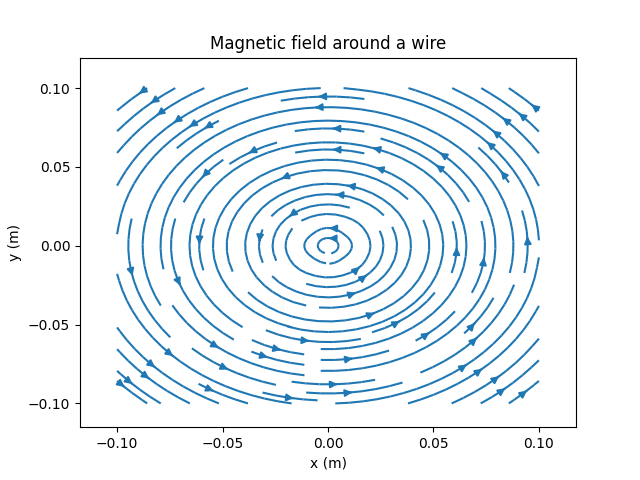

Text(0.5, 1.0, 'Magnetic field around a wire')

In [6]:
#%matplotlib inline

plt.figure()
plt.streamplot(X, Y, Bx, By)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Magnetic field around a wire")

## Plotting functions in 3D

$$ f(x,y) = x^2 + y^2 $$

In [18]:
#%matplotlib inline

# set up the meshgrids
xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(-5,5,11)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values


Z = X**2 + Y**2  # compute 2D array of Z values
plt.figure()
plt.contourf(X, Y, Z)
plt.colorbar()

<IPython.core.display.Javascript object>

## Access the mplot3d toolkit
[The mplot3d toolkit tutorial](https://matplotlib.org/tutorials/toolkits/mplot3d.html) contains examples of the various plots.

In [19]:
# import the 3D plotting functions from matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Z')

## Make a Sphere
Use spherical coordinates
<img src="519px-3D_Spherical.svg.png" alt="drawing" width="400"/>

In [21]:
# Dr Zwickl will code here
thetarange = np.linspace(0,np.pi, 15)
phirange = np.linspace(0,2*np.pi, 30)

THETA, PHI = np.meshgrid(thetarange, phirange)

X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)


<IPython.core.display.Javascript object>


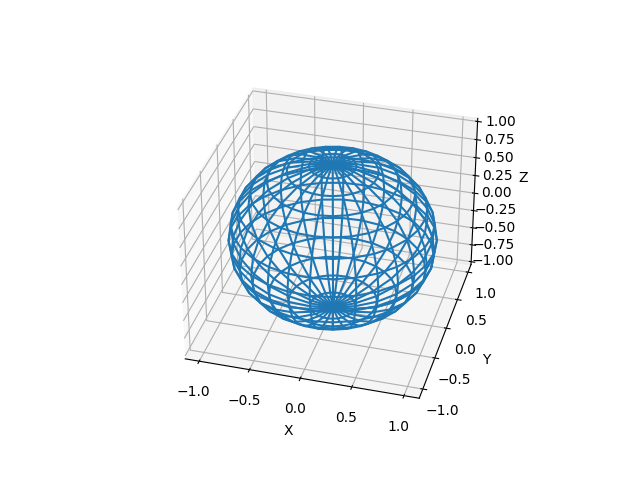

Text(0.5, 0, 'Z')

In [22]:
# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

## Can we make a donut?

In [23]:
# Dr Zwickl will code here
thetarange = np.linspace(0,2*np.pi, 20)
phirange = np.linspace(0,2*np.pi, 30)

donutrad = 2

THETA, PHI = np.meshgrid(thetarange, phirange)

X = (donutrad + np.sin(THETA) ) * np.cos(PHI)
Y = (donutrad + np.sin(THETA) ) * np.sin(PHI)
Z = np.cos(THETA)

<IPython.core.display.Javascript object>


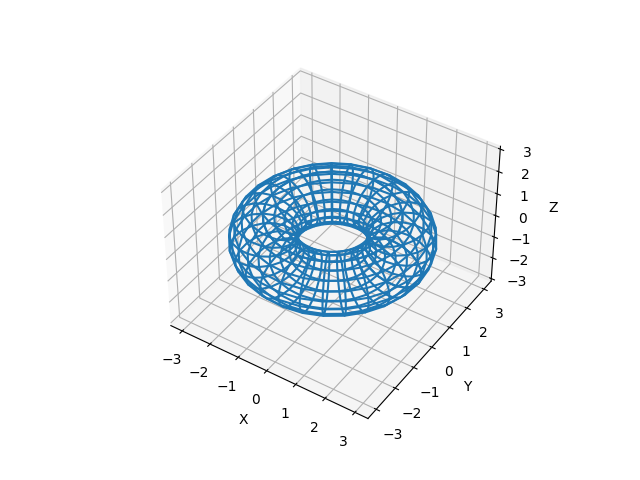

(-3.0, 3.0)

In [25]:
%matplotlib notebook

# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_zlim3d(-3, 3)

# Visualizing flux through a surface
A point charge is positioned at the origin, and is at the center of a cube.

In [97]:
x = 1  # fixed x value (positive x face of cube)
yrange = np.linspace(-1, 1, 9)
zrange = np.linspace(-1, 1, 9)
Y, Z = np.meshgrid(yrange, zrange)

In [98]:
from scipy.constants import epsilon_0
const = 1/(4* np.pi* epsilon_0)
q = 1

R = (x**2 + Y**2 + Z**2) **0.5

Ex = const * q * x/ R**3
Ey = const * q * Y/ R**3
Ez = const * q * Z/ R**3

Emax = np.max(  (Ex**2 + Ey**2 + Ez**2)**0.5 ) 

<IPython.core.display.Javascript object>


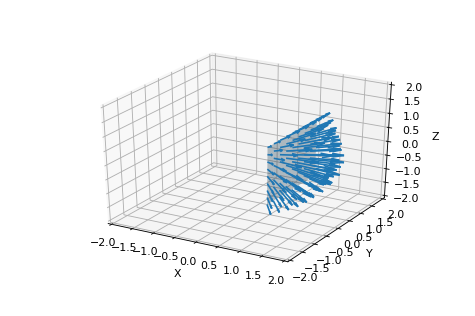

(-2, 2)

In [99]:
%matplotlib notebook

# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.quiver(x, Y, Z, Ex/Emax, Ey/Emax, Ez/Emax)  
ax.plot_surface(x,Y,Z, alpha = 0.3)

# add labels to the 3D axes object
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_xlim(-2,2); ax.set_ylim(-2,2); ax.set_zlim(-2,2)

## Calculate Flux

$$\Phi_E = \iint\limits_\textrm{surface} \vec{E}\cdot d\vec{A} = \iint\limits_\textrm{surface} \vec{E}\cdot \hat{n}\ dA$$

For the scenario above where it is the positive x face of a cube.

1. What is $\hat{n}$ for this specific problem (in math notation)?
1. What is $dA$ for this specific problem (in math notation)?

In [100]:
x = 1  # fixed x value (positive x face of cube)
yrange = np.linspace(-1, 1, 110)
zrange = np.linspace(-1, 1, 110)

Y, Z = np.meshgrid(yrange, zrange)

# dA calculation
dy = yrange[1] - yrange[0]
dz = zrange[1] - zrange[0]
dA = dy * dz

# components of the normal vector
nx = 1
ny = 0
nz = 0

In [101]:
# E-field calculation (copied from above)

from scipy.constants import epsilon_0
const = 1/(4* np.pi* epsilon_0)
q = 1

R = (x**2 + Y**2 + Z**2) **0.5

Ex = const * q * x/ R**3
Ey = const * q * Y/ R**3
Ez = const * q * Z/ R**3

## Express the flux in terms of the variables for the E-field and the normal vectors

`Ex`, `Ey`, `Ez`, `nx`, `ny`, `nz`, `dA`

In [102]:
Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

flux_total = Dflux.sum()

In [103]:
print( flux_total )
print( flux_total * epsilon_0)

print( )

19013707536.623543
0.16835093763856915

